In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import math
sns.set_style('whitegrid')
sns.set_context('talk')

def millify(n):
    """Convert integer to human readable format.
    Parameters
    ----------
    n : int
    Returns
    -------
    millidx : str
              Formatted integer
    """
    millnames = ['', ' K', ' M', ' B', ' T']
    # Source: http://stackoverflow.com/a/3155023/756986
    n = float(n)
    millidx = max(
        0,
        min(
            len(millnames) - 1,
            int(math.floor(0 if n == 0 else math.log10(abs(n)) / 3))))

    return '{:.1f}{}'.format(n / 10**(3 * millidx), millnames[millidx])


Populating the interactive namespace from numpy and matplotlib


/home/saket/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/saket/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/saket/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
normal_df = pd.read_table('/Z/personal-folders/interns/saket/histopath_data/patches_dataframe/training/normal/master_df.tsv')
normal_df['slide_type'] = 'normal'
normal_df['is_tumor'] = False

In [3]:
tumor_df = pd.read_table('/Z/personal-folders/interns/saket/histopath_data/patches_dataframe/training/tumor/master_df.tsv')
tumor_df['slide_type'] = 'tumor'

In [4]:
master_df = pd.concat([normal_df, tumor_df])

/home/saket/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


# Total number of slides of both type

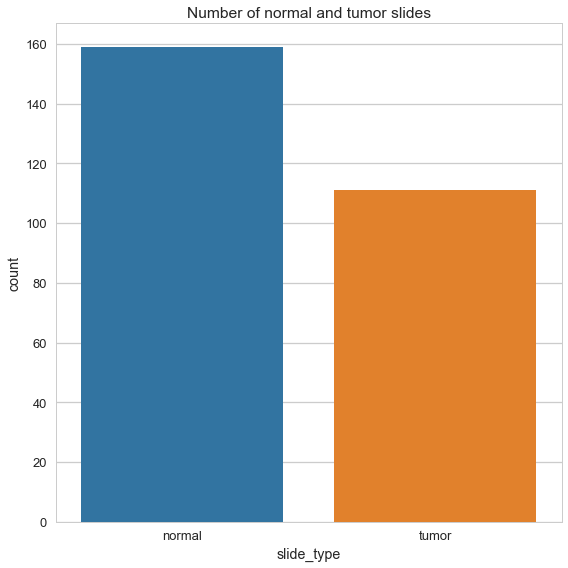

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(data=master_df[['uid','slide_type']].drop_duplicates(), x='slide_type', ax=ax)
#ax.set_yticklabels(list([millify(x) for x in ax.get_yticks()]))
ax.set_title('Number of normal and tumor slides')
fig.tight_layout()
fig.savefig('plots_exploratory_analysis/number_of_slides.pdf')

# Number of normal and tumor patches across samples

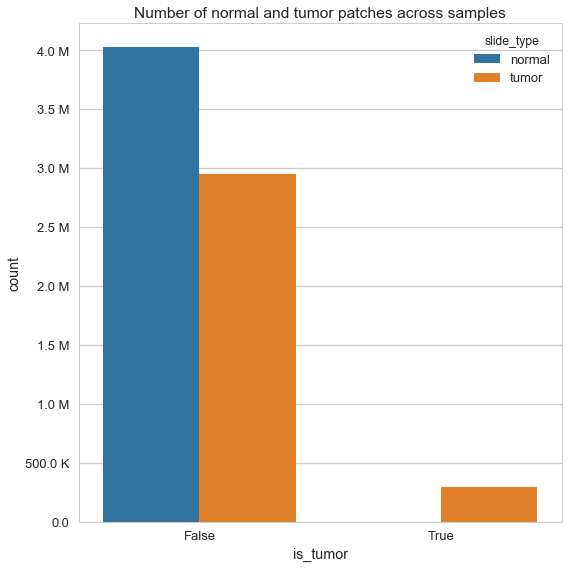

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(data=master_df, x='is_tumor', hue='slide_type', ax=ax)
ax.set_yticklabels(list([millify(x) for x in ax.get_yticks()]))
ax.set_title('Number of normal and tumor patches across samples')
fig.tight_layout()
fig.savefig('plots_exploratory_analysis/slide_wise_counts.pdf')

# Slidewise number of tumor and normal patch distribution

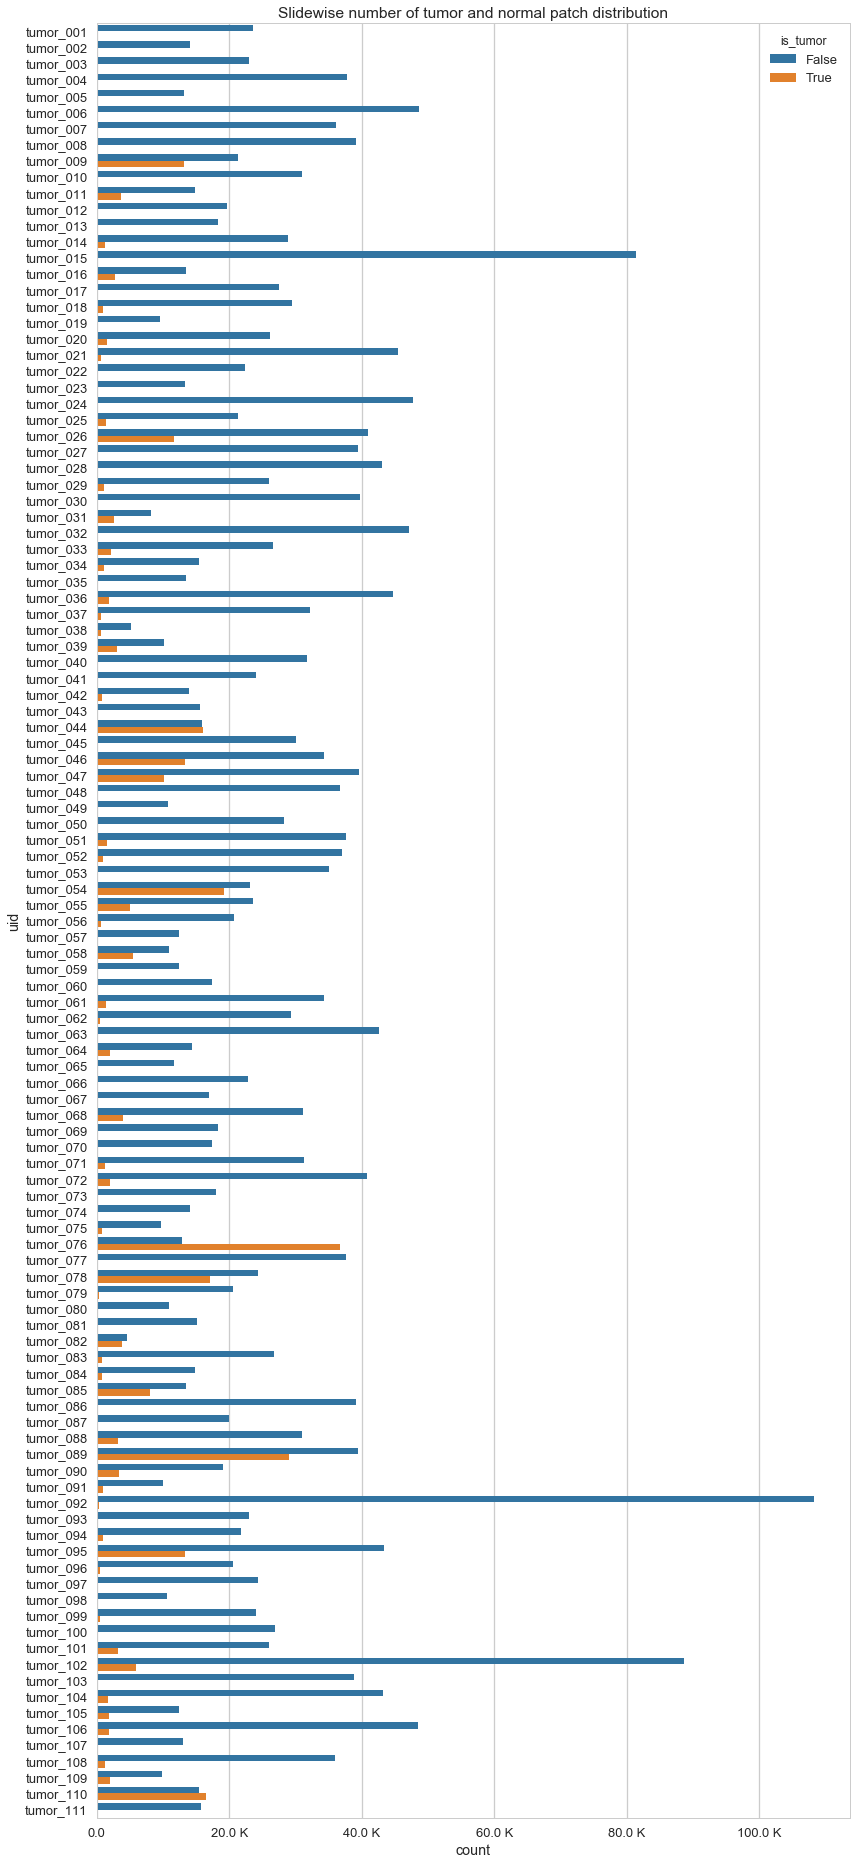

In [7]:
fig, ax = plt.subplots(figsize=(12, 26))
sns.countplot(data=tumor_df, y='uid', hue='is_tumor', ax=ax)
#ax.tick_params(axis='x', labelrotation=90)
#ax.set_yticklabels(list([millify(x) for x in ax.get_yticks()]))
ax.set_xticklabels(list([millify(x) for x in ax.get_xticks()]))
ax.set_title('Slidewise number of tumor and normal patch distribution')
#ax.tick_params(axis='y', labelrotation=90)
fig.tight_layout()
fig.savefig('plots_exploratory_analysis/slide_wise_counts.pdf')

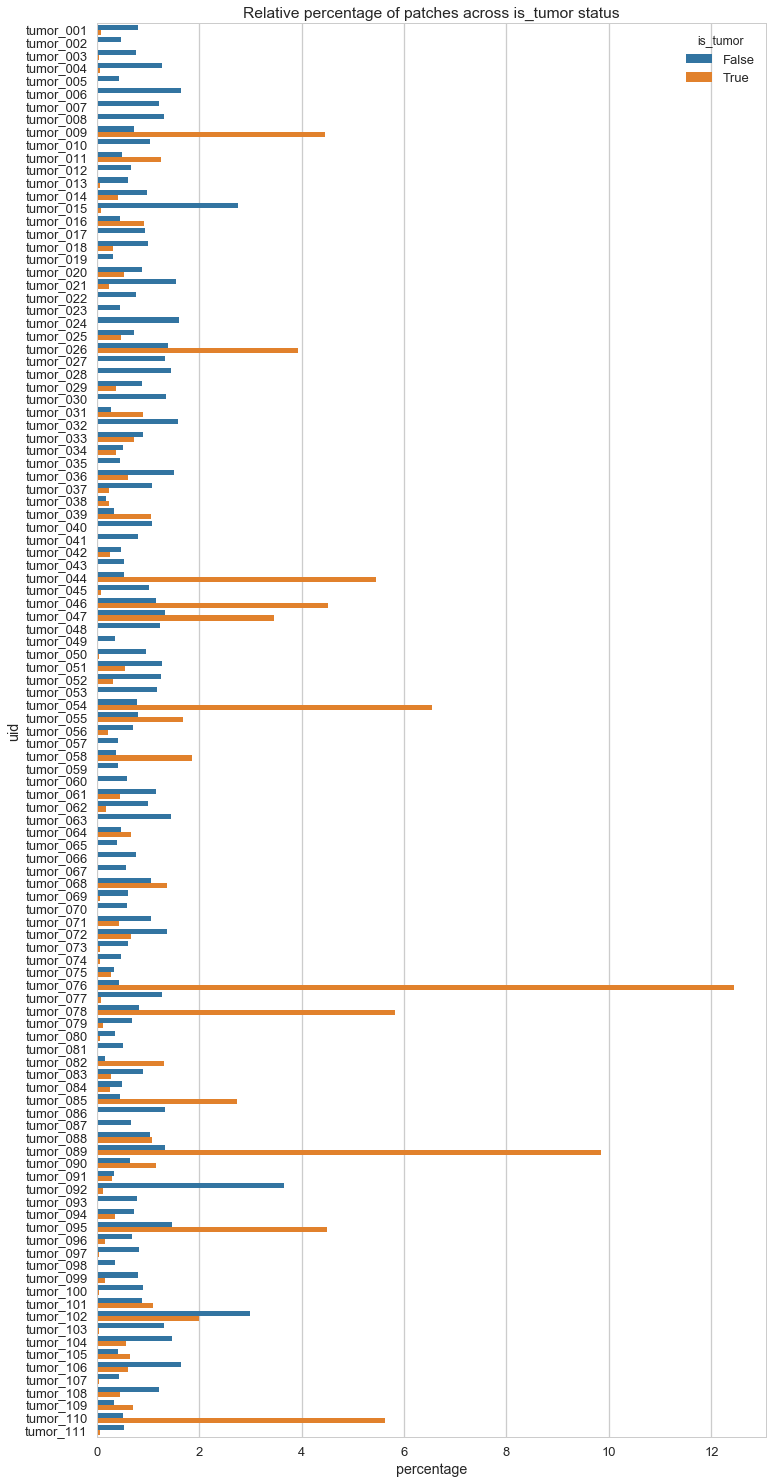

In [8]:
x, y, hue = 'uid', 'percentage', 'is_tumor'
prop_df = (tumor_df[x]
           .groupby(tumor_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .multiply(100)
           .reset_index())
prop_df = prop_df.sort_values(by=['uid'])

fig, ax = plt.subplots(figsize=(12, 26))
sns.barplot(y=x, x=y, hue=hue, data=prop_df, ax=ax)
ax.set_title('Relative percentage of patches across is_tumor status')
fig.savefig('plots_exploratory_analysis/rel_percent_across_tumor.pdf')

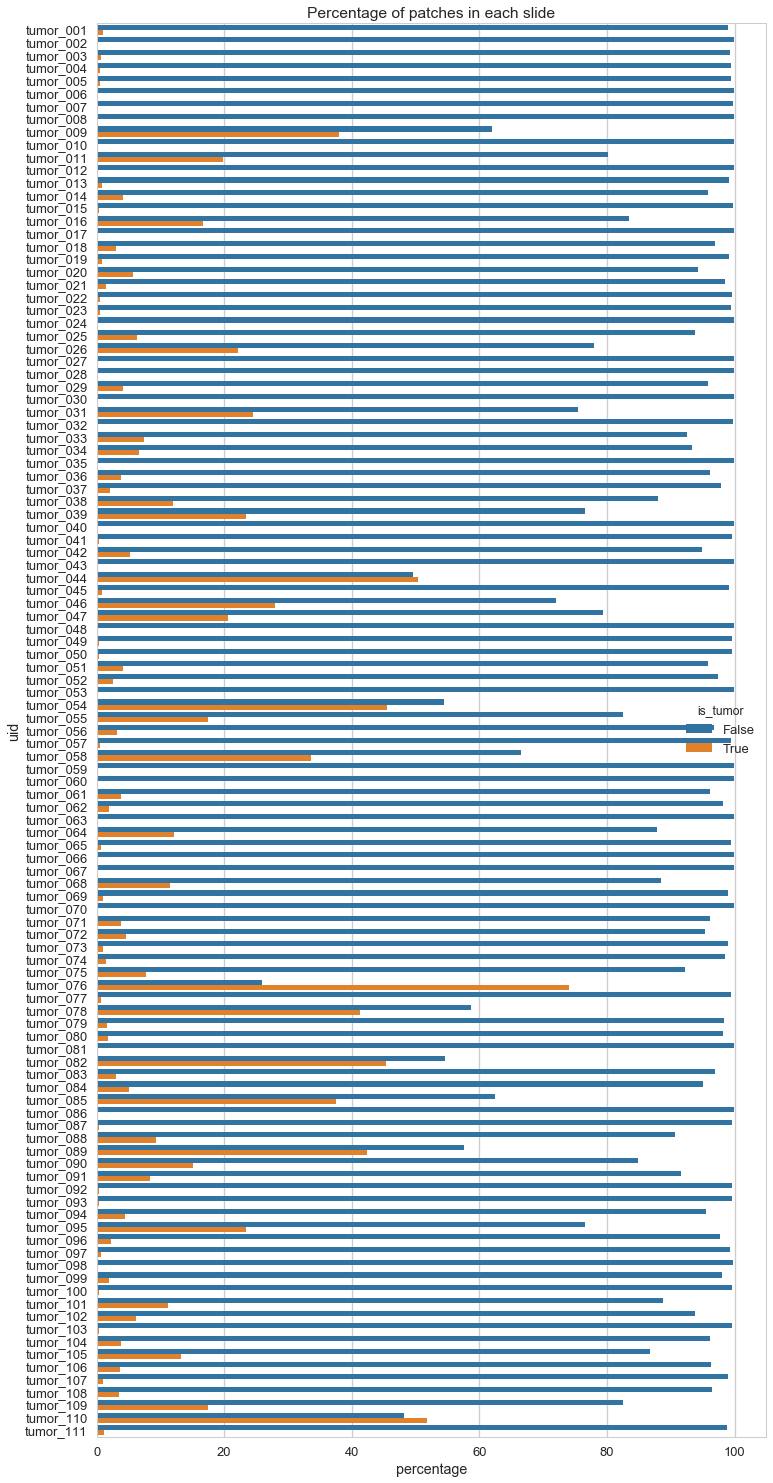

In [9]:
df_percentage = (tumor_df.groupby(['uid'])['is_tumor']
                 .value_counts(normalize=True)
                 .rename('percentage')
                 .multiply(100)
                 .reset_index()
                 .sort_values('uid'))
fig, ax = plt.subplots(figsize=(12, 26))
sns.barplot(x='percentage', y='uid', hue='is_tumor', data=df_percentage, ax=ax)
ax.set_title('Percentage of patches in each slide')
fig.savefig('plots_exploratory_analysis/slide_wise_percentage.pdf')


# Distribution of patches in normal samples

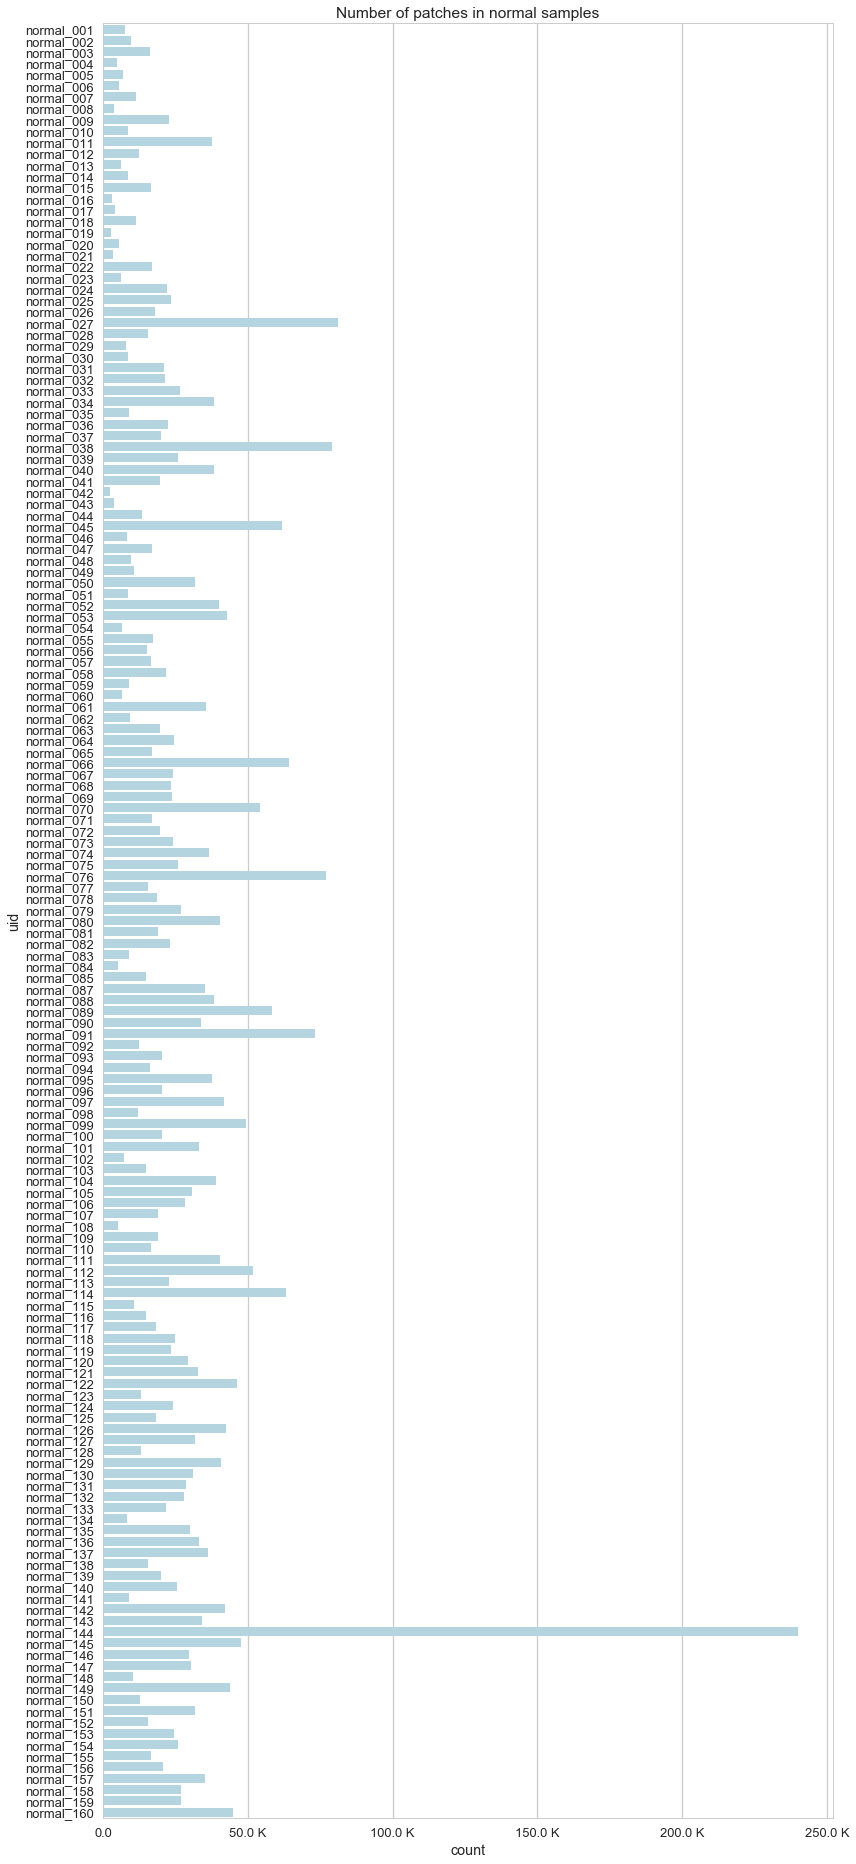

In [10]:
fig, ax = plt.subplots(figsize=(12, 26))
sns.countplot(data=normal_df, y='uid',ax=ax, color='lightblue')
ax.set_xticklabels(list([millify(x) for x in ax.get_xticks()]))
ax.set_title('Number of patches in normal samples')
fig.tight_layout()
fig.savefig('plots_exploratory_analysis/normal_patch_counts.pdf')

# Mean and variance of samples 

In [11]:
tumor_summary_df = tumor_df['uid'].groupby(tumor_df['is_tumor']).value_counts().groupby('is_tumor').describe()
tumor_summary_df['sum'] = tumor_summary_df['mean'] * tumor_summary_df['count']
tumor_summary_df = tumor_summary_df.astype(int).reset_index()
tumor_summary_df.to_csv('plots_exploratory_analysis/tumor_df_summary.tsv', sep='\t', index=False, header=True)
tumor_summary_df

,is_tumor,count,mean,std,min,25%,50%,75%,max,sum
0,False,111,26605,15981,4656,14857,23628,36056,108210,2953199
1,True,111,2656,5786,6,70,489,1932,36705,294854


In [16]:
print(tumor_summary_df.to_latex())

\begin{tabular}{llrrrrrrrrr}
\toprule
{} &  is\_tumor &  count &   mean &    std &   min &    25\% &    50\% &    75\% &     max &      sum \\
\midrule
0 &     False &    111 &  26605 &  15981 &  4656 &  14857 &  23628 &  36056 &  108210 &  2953199 \\
1 &      True &    111 &   2656 &   5786 &     6 &     70 &    489 &   1932 &   36705 &   294854 \\
\bottomrule
\end{tabular}



In [20]:
normal_summary_df = normal_df['uid'].groupby(normal_df['is_tumor']).value_counts().describe()
normal_summary_df = pd.DataFrame(normal_summary_df).T.reset_index(drop=True)
normal_summary_df['sum'] = normal_summary_df['mean']*normal_summary_df['count']
normal_summary_df = normal_summary_df.astype(int).reset_index(drop=True)

normal_summary_df.to_csv('plots_exploratory_analysis/normal_df_summary.tsv', 
                         sep='\t', 
                         index=False, 
                         header=True)
normal_summary_df

,count,mean,std,min,25%,50%,75%,max,sum
0,159,25321,23415,2272,12252,20755,32361,240185,4026196


In [21]:
print(normal_summary_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  count &   mean &    std &   min &    25\% &    50\% &    75\% &     max &      sum \\
\midrule
0 &    159 &  25321 &  23415 &  2272 &  12252 &  20755 &  32361 &  240185 &  4026196 \\
\bottomrule
\end{tabular}



# Testing dataset

In [13]:
test_df = pd.read_table('/Z/personal-folders/interns/saket/histopath_data/patches_dataframe/testing/master_df.tsv')
test_df.head()

/home/saket/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,is_tissue,is_tumor,json_filepath,slide_path,tile_loc,uid
0,True,False,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,"(12, 177)",test_001
1,True,False,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,"(13, 175)",test_001
2,True,False,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,"(13, 176)",test_001
3,True,False,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,"(13, 177)",test_001
4,True,False,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,"(13, 178)",test_001


In [22]:
test_summary_df = test_df['uid'].groupby(test_df['is_tumor']).value_counts().groupby('is_tumor').describe()
test_summary_df['sum'] = test_summary_df['mean'] * test_summary_df['count']
test_summary_df = test_summary_df.astype(int).reset_index()
test_summary_df['sum'] = test_summary_df['mean']*test_summary_df['count']

test_summary_df.to_csv('plots_exploratory_analysis/test_df_summary.tsv', sep='\t', index=False, header=True)


In [23]:
print(test_summary_df.to_latex())

\begin{tabular}{llrrrrrrrrr}
\toprule
{} &  is\_tumor &  count &   mean &    std &   min &    25\% &    50\% &    75\% &    max &      sum \\
\midrule
0 &     False &     48 &  23290 &  14914 &  4080 &  13314 &  19915 &  28026 &  81311 &  1117920 \\
1 &      True &     48 &   4858 &  14165 &     5 &     40 &    258 &   1718 &  80717 &   233184 \\
\bottomrule
\end{tabular}

